In [1]:
from keybert import KeyBERT
import psycopg2 
import os
from dotenv import load_dotenv
import pandas as pd
import numpy as np
from numpy import array, log, where

load_dotenv()

host = os.getenv("DB_HOST")
db = os.getenv("DB_NAME")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
port = os.getenv("DB_PORT")

In [2]:
try: 
    conn = psycopg2.connect(dbname=db, user=user, password=password, host=host, port=port)
    cursor = conn.cursor() 
except:
    print("Failed to connect to database. Please try again.")

cursor.execute('''SELECT x.* FROM public.jobs x
                WHERE searchterm = 'Beauty'
                limit 100''')
records = cursor.fetchall()

In [3]:
# Zip it all up into one loooong string
descriptions = list(zip(*records))[13]
descStr = ' '.join(descriptions)

kw_model = KeyBERT()
keywords = kw_model.extract_keywords(descStr)

results = kw_model.extract_keywords(descStr, keyphrase_ngram_range=(1,1), top_n=10, stop_words=None)
print(results)

keywords = list(zip(*results))[0]
print(keywords)

[('salons', 0.4621), ('salon', 0.4613), ('salonschools', 0.4599), ('clients', 0.4547), ('clientes', 0.4349), ('barbershop', 0.4318), ('consulting', 0.4216), ('consultant', 0.4162), ('appointments', 0.4044), ('customers', 0.4026)]
('salons', 'salon', 'salonschools', 'clients', 'clientes', 'barbershop', 'consulting', 'consultant', 'appointments', 'customers')


In [4]:
def create_df(cursor_list):
    vendorids = [tuple[1] for tuple in cursor_list]
    ids = [tuple[0] for tuple in cursor_list]
    positionnames = [tuple[2] for tuple in cursor_list]
    companys = [tuple[3] for tuple in cursor_list]
    locations = [tuple[4] for tuple in cursor_list]
    searchterms = [tuple[5] for tuple in cursor_list]
    searchareas = [tuple[6] for tuple in cursor_list]
    scrapedats = [tuple[7] for tuple in cursor_list]
    createdats = [tuple[8] for tuple in cursor_list]
    postedats = [tuple[9] for tuple in cursor_list]
    salarys = [tuple[10] for tuple in cursor_list]
    benefits = [tuple[11] for tuple in cursor_list]
    requirements = [tuple[12] for tuple in cursor_list]
    descriptions = [tuple[13] for tuple in cursor_list]
    indeedlinks = [tuple[14] for tuple in cursor_list]

    df = pd.DataFrame(data = {'id': ids, 'vendorid': vendorids, 'positionname': positionnames, 'company': companys, 'location': locations, 'searchterm': searchterms, 'searcharea': searchareas, 'scrapedat': scrapedats, 'createdat': createdats, 'postedat': postedats, 'salary': salarys, 'benefits': benefits, 'requirements': requirements, 'description': descriptions, 'indeedlink': indeedlinks})

    return df

In [5]:
cursor.execute('''SELECT * FROM jobs;''')
all_job_data = cursor.fetchall()

In [7]:
df = create_df(all_job_data)

In [8]:
df.head()

,id,vendorid,positionname,company,location,searchterm,searcharea,scrapedat,createdat,postedat,salary,benefits,requirements,description,indeedlink
0,153553,413e46bb3e25b84e,REGISTERED NURSE MANAGER - NURSE CASE MANAGEME...,Next GenHealth Staffing,"El Paso, TX 79911",Nursing,"El Paso, Texas",2023-03-11 07:31:42.224,2023-03-11 07:33:20.184719,NaT,$31 - $48 an hour,None,None,\n JOB RESPONSIBILITIES-\n Registered Nurse M...,https://www.indeed.com/rc/clk?jk=413e46bb3e25b...
1,153565,7bb2e2c11c8b5fec,Field Reviewer,Change Healthcare,"El Paso, TX",Nursing,"El Paso, Texas",2023-03-11 07:31:50.389,2023-03-11 07:33:20.404178,NaT,$18.75 an hour,None,None,Change Healthcare is a leading healthcare tech...,https://www.indeed.com/company/Change-Healthca...
2,153572,59686a3bd212dfa4,Montana - Travel Emergency Room (ER) Registere...,"Wesley Medical Staffing, Inc.",United States,Nursing,"El Paso, Texas",2023-03-11 07:31:53.582,2023-03-11 07:33:20.526021,NaT,"$1,085 a week",None,None,"Shifts and Contract Length: 12 hour shifts, da...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
3,153573,fe43ca317b564d4e,Licensed Vocational Nurse (LVN),"Envision Healthcare Services, Inc","El Paso, TX",Nursing,"El Paso, Texas",2023-03-11 07:31:53.989,2023-03-11 07:33:20.542944,NaT,$23 - $25 an hour,None,None,Job Summary\nThe primary function is to provid...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
4,153581,eb31edc3c4ed2d36,"Travel Medical Surgical RN job in El Paso, TX ...",Aya Healthcare,"El Paso, TX 79902",Nursing,"El Paso, Texas",2023-03-11 07:31:58.769,2023-03-11 07:33:20.683619,NaT,"$1,894 - $2,057 a week",None,None,\n This is a 13-week contract position that re...,https://www.indeed.com/rc/clk?jk=eb31edc3c4ed2...


In [9]:
technology = df[df['searchterm'] == 'Technology']
technology.head()

,id,vendorid,positionname,company,location,searchterm,searcharea,scrapedat,createdat,postedat,salary,benefits,requirements,description,indeedlink
129,154370,d6f6db44937d6031,Data Analyst And Support,YWCA El Paso del Norte,"1600 Brown St, El Paso, TX 79902",Technology,"El Paso, Texas",2023-03-11 07:42:42.711,2023-03-11 07:44:58.733178,NaT,"$70,000 a year",None,None,About us\nYWCA El Paso del Norte is a medium b...,https://www.indeed.com/company/YWCA-El-Paso-de...
130,154376,dbdebcb57edd03f6,Information Technology and Cybersecurity Profe...,Corporate Gray,Texas,Technology,"El Paso, Texas",2023-03-11 07:43:14.320,2023-03-11 07:44:58.848098,NaT,"$75,000 - $180,000 a year",None,None,Many of our clients are seeking Information Te...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
131,154381,d1e57521f5b9f3a7,GIS Programmer/Database Analyst,"City of El Paso, TX","El Paso, TX",Technology,"El Paso, Texas",2023-03-11 07:43:18.314,2023-03-11 07:44:58.937879,NaT,"$55,580 - $90,430 a year",None,None,\n \n \n Requirements\n \n \n \n \n ...,https://www.indeed.com/rc/clk?jk=d1e57521f5b9f...
132,154384,de22fc6cdcee1721,Information Technology Asset Management Specia...,"City of El Paso, TX","El Paso, TX",Technology,"El Paso, Texas",2023-03-11 07:43:19.405,2023-03-11 07:44:58.995084,NaT,"$50,650 - $82,890 a year",None,None,\n \n \n Requirements\n \n \n \n MOS ...,https://www.indeed.com/rc/clk?jk=de22fc6cdcee1...
133,154385,68027a608ddc3f36,Help Desk Technician I,Masser Technologies,"5862 Cromo Dr, El Paso, TX 79912",Technology,"El Paso, Texas",2023-03-11 07:43:19.642,2023-03-11 07:44:59.013395,NaT,$14 - $18 an hour,None,None,Minimum Requirements:\n\n CompTIA A+ Certifica...,https://www.indeed.com/company/Masser-Technolo...


In [10]:
technology['description'].iloc[0]

"About us\nYWCA El Paso del Norte is a medium business in NON_PROFIT_ASSOCIATION in El Paso, TX. We are professional, agile and innovative.\nOur work environment includes:\n\n Modern office setting\n\nJOB SUMMARY:\nUnder general supervision, based on the organizations strategic plan and objectives, will map out and coordinate the activities for the design, development, and execution of YWCA’s company’s database and software applications. Responsible for the maintenance, support, and upgrading of existing applications. Apply communication and analytical skills and knowledge of best practices to navigate the team on problems related to the applications development. Acts as a technical and subject matter expert throughout the lifecycle of all assigned applications.\n\n Regular attendance at Employer's place of business and/or during particular hours, as assigned, is an essential function of this position. Employee must comply with and follow YWCA’s attendance policy at all times, unless a

In [11]:
import nltk
from collections import Counter

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chekfamily/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
tokens = technology['description'].iloc[0].lower().split()

In [13]:
tokens

['about',
 'us',
 'ywca',
 'el',
 'paso',
 'del',
 'norte',
 'is',
 'a',
 'medium',
 'business',
 'in',
 'non_profit_association',
 'in',
 'el',
 'paso,',
 'tx.',
 'we',
 'are',
 'professional,',
 'agile',
 'and',
 'innovative.',
 'our',
 'work',
 'environment',
 'includes:',
 'modern',
 'office',
 'setting',
 'job',
 'summary:',
 'under',
 'general',
 'supervision,',
 'based',
 'on',
 'the',
 'organizations',
 'strategic',
 'plan',
 'and',
 'objectives,',
 'will',
 'map',
 'out',
 'and',
 'coordinate',
 'the',
 'activities',
 'for',
 'the',
 'design,',
 'development,',
 'and',
 'execution',
 'of',
 'ywca’s',
 'company’s',
 'database',
 'and',
 'software',
 'applications.',
 'responsible',
 'for',
 'the',
 'maintenance,',
 'support,',
 'and',
 'upgrading',
 'of',
 'existing',
 'applications.',
 'apply',
 'communication',
 'and',
 'analytical',
 'skills',
 'and',
 'knowledge',
 'of',
 'best',
 'practices',
 'to',
 'navigate',
 'the',
 'team',
 'on',
 'problems',
 'related',
 'to',
 'the

In [14]:
from nltk.corpus import stopwords
from collections import Counter

def remove_stopwords(tokens: list):
    filtered = [w for w in tokens if not w in stopwords.words('english')]
    # count = Counter(filtered)
    # print(count.most_common(100))
    return filtered

filtered = remove_stopwords(tokens)

In [15]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chekfamily/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/chekfamily/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [16]:
from nltk.stem import WordNetLemmatizer

def lemmatize_tokens(tokens, lemmatizer):
    lemmatized_tokens = []
    for item in tokens:
        lemmatized_tokens.append(lemmatizer.lemmatize(item))
    return lemmatized_tokens

lemmatizer = WordNetLemmatizer()
lemmatized = lemmatize_tokens(filtered, lemmatizer)

In [17]:
lemma_count = Counter(lemmatized)
print(lemma_count.most_common(100))

[('software', 13), ('must', 12), ('data', 9), ('work', 7), ('database', 6), ('able', 6), ('business', 5), ('existing', 5), ('knowledge', 5), ('and/or', 5), ('insurance', 5), ('job', 4), ('applications.', 4), ('application', 4), ('function', 4), ('development', 4), ('new', 4), ('required.', 4), ('ability', 4), ('el', 3), ('design,', 3), ('skill', 3), ('problem', 3), ('related', 3), ('assigned', 3), ('policy', 3), ('program', 3), ('agency', 3), ('performs', 3), ('process', 3), ('programming', 3), ('access', 3), ('experience', 3), ('year', 3), ('(required)', 3), ('paso,', 2), ('based', 2), ('organization', 2), ('development,', 2), ('ywca’s', 2), ('communication', 2), ('analytical', 2), ('team', 2), ('technical', 2), ('throughout', 2), ('regular', 2), ('attendance', 2), ('employee', 2), ('required', 2), ('need', 2), ('manage', 2), ('procedure', 2), ('procedures,', 2), ('wide', 2), ('training', 2), ('develops', 2), ('applications,', 2), ('analysis', 2), ('research', 2), ('needed', 2), ('sup

In [18]:
def create_huge_list_of_cleaned_tokens(df):
    cleaned_tokens = []
    for description in list(df['description'][0:10]):
        tokens = description.lower().split()
        filtered = remove_stopwords(tokens)

        lemmatizer = WordNetLemmatizer()
        lemmatized = lemmatize_tokens(filtered, lemmatizer)
        
        cleaned_tokens.extend(lemmatized)

    return cleaned_tokens

In [29]:
# TAKES FOREVER
cleaned_tokens = create_huge_list_of_cleaned_tokens(technology)
print(cleaned_tokens)

['role:', 'well', 'fargo,', 'looking', 'talented', 'people', 'put', 'customer', 'center', 'everything', 'do.', 'seeking', 'candidate', 'embrace', 'diversity,', 'equity', 'inclusion', 'workplace', 'everyone', 'feel', 'valued', 'inspired.', 'help', 'u', 'build', 'better', 'well', 'fargo.', 'begin', 'outstanding', 'talent.', 'begin', 'you.', 'well', 'fargo', 'seeking', 'senior', 'software', 'engineer', 'digital', 'technology', 'innovation', 'group', 'support', 'evolving', 'digital', 'platform', 'enhances', 'integration', 'innovation', 'pipeline', 'customer-facing', 'capabilities.', 'role,', 'will:', 'lead', 'moderately', 'complex', 'initiative', 'deliverable', 'within', 'technical', 'domain', 'environment', 'contribute', 'large', 'scale', 'planning', 'strategy', 'design,', 'code,', 'test,', 'debug,', 'document', 'project', 'program', 'associated', 'technology', 'domain,', 'including', 'upgrade', 'deployment', 'review', 'moderately', 'complex', 'technical', 'challenge', 'require', 'in-dept

In [ ]:
# TF IDF lets me input a search term and get scores showing which documents are the most relevant to it
# In this case the search terms are words in the job descriptions, and the documents are the job descriptions themselves
# So this is in the opposite direction of what Lee was trying to do, which is find the keywords in the job descriptions

In [18]:
tech_tc = nltk.TextCollection(technology['description'])

In [19]:
tech_tc.tf_idf('Project', technology['description'].iloc[0])

0.0

In [20]:
# This job posting from Northeastern has a description of just '', an empty string. Breaks below code without the try/catch
technology.iloc[1504]

id                                                          39033
vendorid                                         238201888a96c8e2
positionname                          Senior System Administrator
company                                             CSA – Careers
location                                           Fort Bliss, TX
searchterm                                             Technology
searcharea                                         El Paso, Texas
scrapedat                              2023-02-11 07:41:54.704000
createdat                              2023-02-11 07:43:03.887674
postedat                                                      NaT
salary                                                       None
benefits                                                     None
requirements                                                 None
description     \n \n  CSA & Capstone are hiring for a Senior ...
indeedlink      https://www.indeed.com/rc/clk?jk=238201888a96c...
Name: 4958

In [21]:
# TextCollection provides tf, idf, and tf_idf abstractions so
# that we don't have to maintain/compute them ourselves
def find_jobs_most_relevant_to_keywords(QUERY_TERMS):
    relevant_jobs = []

    for idx in range(len(technology['description'])):
        score = 0
        for term in [t.lower() for t in QUERY_TERMS]:
            try:
                score += tech_tc.tf_idf(term, technology['description'].iloc[idx])
            except:
                print('Error. Index was {}, term was {}, description was{}. \n\n'.format(idx, term, technology['description'].iloc[idx]))
        if score > 0:
            relevant_jobs.append({'score': score,
                                'index': idx,
                                'position_name': technology['positionname'].iloc[idx], 
                                'company': technology['company'].iloc[idx]})

    # Sort by score and display results

    relevant_jobs = sorted(relevant_jobs, key=lambda p: p['score'], reverse=True)
    for job in relevant_jobs[0:5]:
        print('Position Name: {0}'.format(job['position_name']))
        print('Index: {0}'.format(job['index']))
        print('Company: {}'.format(job['company']))
        print('Score: {0}'.format(job['score']))
        print()

In [22]:
find_jobs_most_relevant_to_keywords(QUERY_TERMS = ['Java', 'Selenium'])

Error. Index was 1754, term was java, description was. 


Error. Index was 1754, term was selenium, description was. 


Error. Index was 4384, term was java, description was. 


Error. Index was 4384, term was selenium, description was. 


Position Name: Java Lead
Index: 4919
Company: Appian Infotech Inc
Score: 0.024215882435484816

Position Name: Java Developer/Architect
Index: 3498
Company: Ghritachi Inc
Score: 0.009019735985801365

Position Name: (SDET) Software Development Engineer in Test (hybrid position)
Index: 3918
Company: Byrne Software Technologies
Score: 0.008349001588521286

Position Name: Salesforce Developer (Only W2)
Index: 928
Company: Metasys Technologies
Score: 0.004686260961683138

Position Name: Full stack Java Developer
Index: 3261
Company: plaxonic
Score: 0.0043971311005455505



In [25]:
find_jobs_most_relevant_to_keywords(QUERY_TERMS = ['Python'])

Error. Index was 2553, term was python, description was. 


Position Name: Automation Engineer
Index: 3143
Company: Kastech Software Solutions Group
Score: 0.011586319264647888

Position Name: QA Automation Engineer - Firmware
Index: 2769
Company: ASK Consulting
Score: 0.007275130701057977

Position Name: Technical Lead
Index: 2751
Company: Wipro Limited
Score: 0.0029793392394808858

Position Name: Azure Big data SRE
Index: 915
Company: Emonics LLC
Score: 0.002914570995144345

Position Name: PySpark/Abinitio Developer
Index: 1804
Company: Capgemini
Score: 0.002502644961163944



In [19]:
print(descStr)

Client Experience - Offers clients a positive experience by greeting, consultation, service performed, and explanation of product benefits used to create the ‘final look’ - Interacts with new and returning clients ensuring each experience extraordinary service - Assists clients at all points - from the front desk to rebooking for future visits • Client Base - Utilizes Salon programs including but not limited to monthly new client acquisition promotion, service demonstrations and client referral offers to attract new clients and build a loyal client base • Performance Standards - Consistently meets established performance standards for the role, including (but not limited to) product and service sales, client service, profit, productivity, attendance, and jcpsalon dress code - state laws and company rules are followed to ensure a clean, safe environment is present for the clients and meets core standards
Job Types: Part-time, Temporary
Pay: $10.00 - $12.00 per hour
Benefits:

 401(k)
 D

In [20]:
def convert_desc_str_to_token_list(descStr: str):
    tokens_list = descStr.split()
    filtered_tokens = remove_stopwords(tokens_list)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = lemmatize_tokens(filtered_tokens, lemmatizer)
    return lemmatized_tokens

In [21]:
lemmatized_tokens = convert_desc_str_to_token_list(descStr)
lemmatized_tokens

['Client',
 'Experience',
 '-',
 'Offers',
 'client',
 'positive',
 'experience',
 'greeting,',
 'consultation,',
 'service',
 'performed,',
 'explanation',
 'product',
 'benefit',
 'used',
 'create',
 '‘final',
 'look’',
 '-',
 'Interacts',
 'new',
 'returning',
 'client',
 'ensuring',
 'experience',
 'extraordinary',
 'service',
 '-',
 'Assists',
 'client',
 'point',
 '-',
 'front',
 'desk',
 'rebooking',
 'future',
 'visit',
 '•',
 'Client',
 'Base',
 '-',
 'Utilizes',
 'Salon',
 'program',
 'including',
 'limited',
 'monthly',
 'new',
 'client',
 'acquisition',
 'promotion,',
 'service',
 'demonstration',
 'client',
 'referral',
 'offer',
 'attract',
 'new',
 'client',
 'build',
 'loyal',
 'client',
 'base',
 '•',
 'Performance',
 'Standards',
 '-',
 'Consistently',
 'meet',
 'established',
 'performance',
 'standard',
 'role,',
 'including',
 '(but',
 'limited',
 'to)',
 'product',
 'service',
 'sales,',
 'client',
 'service,',
 'profit,',
 'productivity,',
 'attendance,',
 'jcpsa

In [43]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

vectorizer = CountVectorizer()

tf = vectorizer.fit_transform(lemmatized_tokens)
tf = tf.toarray()
tf = log(tf + 1)

tfidf = tf.copy()
words = array(vectorizer.get_feature_names_out())
for k in lemmatized_tokens:
    if k in words:
        tfidf[:, words == k] = tfidf[:, words == k] * cleaned_tokens[np.where(words == k)[0][0]]

for j in range(tfidf.shape[0]):
    print("Keywords of article", str(j+1), words[tfidf[j, :].argsort()[-5:][::-1]])

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('float64'), dtype('<U13')) -> None

In [23]:
from summa import keywords
# from pytopicrank import TopicRank
from yake import KeywordExtractor

In [27]:
for j in range(10):
    print("Keywords of article", str(j+1), "\n", (keywords.keywords(df['description'][j], words=5)).split("\n"))

Keywords of article 1 
 ['manager', 'management', 'manage', 'rn', 'nurse', 'nursing', 'job', 'evaluating', 'evaluations', 'evaluate']
Keywords of article 2 
 ['medical', 'required', 'requirements', 'require', 'healthcare', 'reviewers', 'review', 'reviews', 'work', 'working']
Keywords of article 3 
 ['patient', 'patients', 'currently', 'current', 'week', 'weeks', 'plan', 'plans', 'care']
Keywords of article 4 
 ['insurance', 'job', 'support', 'covid', 'availability']
Keywords of article 5 
 ['includes paid', 'law including', 'laws', 'aya', 'housing']
Keywords of article 6 
 ['ramen', 'paso', 'tx', 'el', 'silverlake']
Keywords of article 7 
 ['position', 'summary', 'pm', 'hourly', 'responsibilities']
Keywords of article 8 
 ['nurse', 'nursing', 'nurses', 'insurance', 'care', 'staff', 'unit']
Keywords of article 9 
 ['patients', 'patient', 'care', 'including', 'medications', 'medication', 'medical', 'shift']
Keywords of article 10 
 ['work', 'working', 'nurse', 'nursing', 'residents', 're

In [29]:
from yake import KeywordExtractor
kw_extractor = KeywordExtractor(lan="en", n=1, top=5)
for j in range(10):
    keywords = kw_extractor.extract_keywords(text=df['description'][j])
    keywords = [x for x, y in keywords]
    print("Keywords of article", str(j+1), "\n", keywords)

Keywords of article 1 
 ['Case', 'Management', 'Nurse', 'Manager', 'Department']
Keywords of article 2 
 ['Medical', 'Travel', 'Healthcare', 'Records', 'required']
Keywords of article 3 
 ['Emergency', 'Room', 'Registered', 'Length', 'Nurse']
Keywords of article 4 
 ['Summary', 'insurance', 'Job', 'Preferred', 'nursing']
Keywords of article 5 
 ['paid', 'sick', 'Surgical', 'leave', 'Aya']
Keywords of article 6 
 ['Ramen', 'Paso', 'Silverlake', 'server', 'Delivering']
Keywords of article 7 
 ['nursing', 'POSITION', 'SUMMARY', 'Medication', 'Socorro']
Keywords of article 8 
 ['Maryland', 'Hospital', 'Southern', 'MedStar', 'care']
Keywords of article 9 
 ['ability', 'work', 'ECG', 'patient', 'care']
Keywords of article 10 
 ['Nurse', 'Bonus', 'work', 'Insurance', 'Staff']


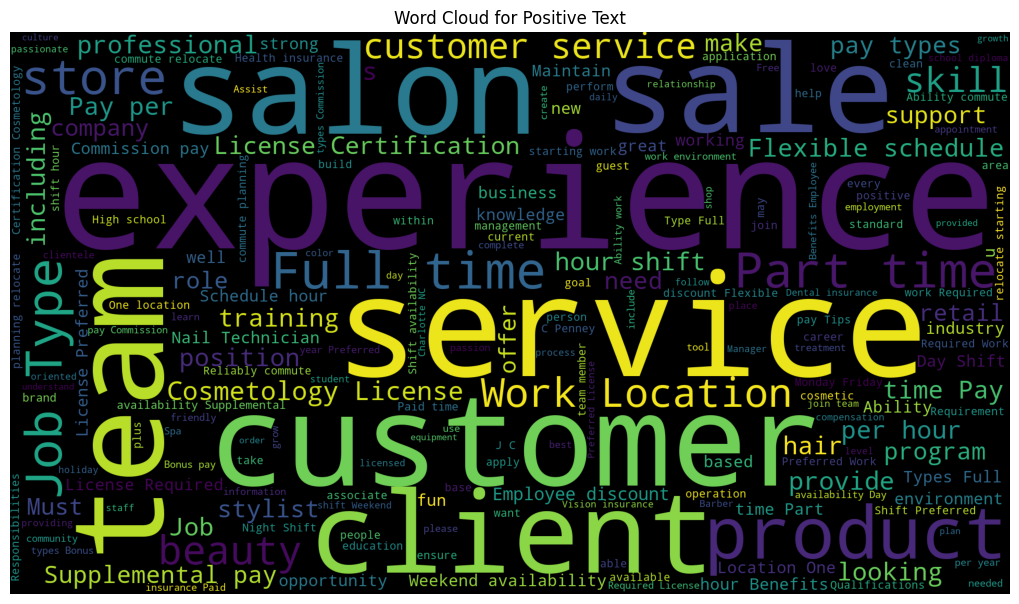

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# WordCloud for Positive text
wordcloud = WordCloud(width=1920,height=1080).generate(" ".join(lemmatized_tokens))
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Word Cloud for Positive Text")
plt.show()